In [53]:
___Author___='LumberJack Jyss'

# LSTM for AMZN with memory

In [54]:
print('LSTM FROM KEREAS with memory\nLumberJack Jyss (c)')

LSTM FROM KEREAS with memory
LumberJack Jyss (c)


In [55]:
import numpy
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [56]:
# Setting the data
start = pd.to_datetime('2016-03-31')
end = pd.to_datetime('2019-03-28')
delta = round((end-start).days)
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')

Période d'étude :  1092
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  874  jours 
Bloc 2 : 218  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


In [57]:
dataset = web.DataReader('AMZN','yahoo',start,end)
#spy_etf = web.DataReader('SPY','yahoo',start,end)
dataset = dataset.drop(['Low','Close','High','Open','Volume'],axis=1)

In [58]:
print("Longueur du dataset : ",len(dataset))

Longueur du dataset :  754


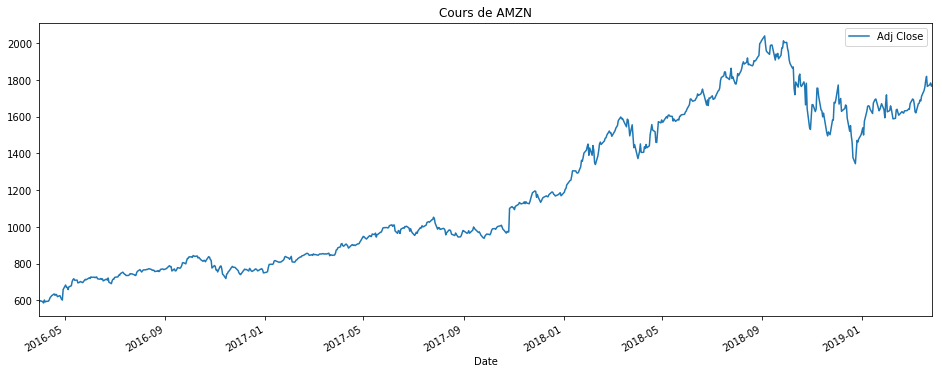

In [59]:
dataset.plot(figsize=(16,6),title='Cours de AMZN')

In [60]:
print('Nombre de valeurs nulles dans le dataset :')
dataset.isnull().sum().sum()

Nombre de valeurs nulles dans le dataset :


0

In [61]:
print('Informations sur le dataset (sur les colonnes, ainsi que leur type)')
dataset.info()

Informations sur le dataset (sur les colonnes, ainsi que leur type)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-03-31 to 2019-03-28
Data columns (total 1 columns):
Adj Close    754 non-null float64
dtypes: float64(1)
memory usage: 11.8 KB


In [62]:
# save to file
print('Le fichier est sauvegardé en local sous format csv')
dataset.to_csv('AMZNu.csv')

Le fichier est sauvegardé en local sous format csv


In [63]:
print('Début du dataset :\n',dataset.head())
print('Fin du dataset :\n',dataset.tail())

Début du dataset :
              Adj Close
Date                  
2016-03-31  593.640015
2016-04-01  598.500000
2016-04-04  593.190002
2016-04-05  586.140015
2016-04-06  602.080017
Fin du dataset :
               Adj Close
Date                   
2019-03-22  1764.770020
2019-03-25  1774.260010
2019-03-26  1783.760010
2019-03-27  1765.699951
2019-03-28  1773.420044


In [64]:
#print('On transforme le dataframe en arrays par la fonction ".values"')
values = dataset.values
# specify columns to plot

On trace alors les plots des différentes colonnes


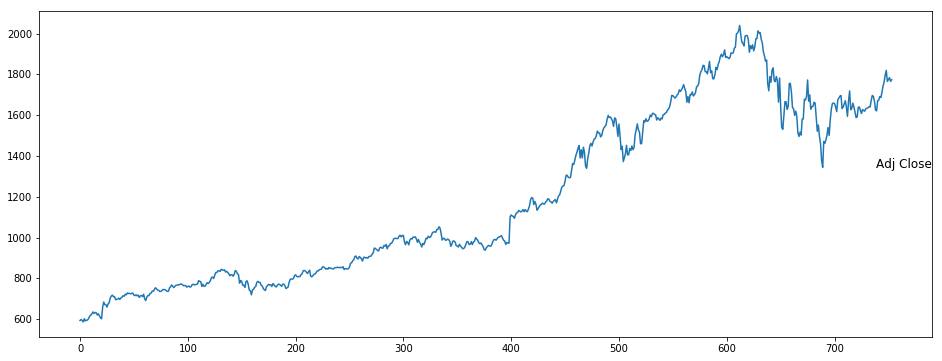

In [66]:
groups = [0]
i = 1
# plot each column
print('On trace alors les plots des différentes colonnes')
plt.figure(figsize=(16,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Month=1, Predicted=1674.756404, Expected=1690.810059
Month=2, Predicted=1692.466487, Expected=1686.219971
Month=3, Predicted=1687.876400, Expected=1712.359985
Month=4, Predicted=1714.016414, Expected=1742.150024
Month=5, Predicted=1743.806453, Expected=1761.849976
Month=6, Predicted=1763.506404, Expected=1797.270020
Month=7, Predicted=1798.926448, Expected=1819.260010
Month=8, Predicted=1820.916439, Expected=1764.770020
Month=9, Predicted=1766.426448, Expected=1774.260010
Month=10, Predicted=1775.916439, Expected=1783.760010
Month=11, Predicted=1785.416439, Expected=1765.699951
Month=12, Predicted=1767.356380, Expected=1773.420044
Test RMSE: 24.609


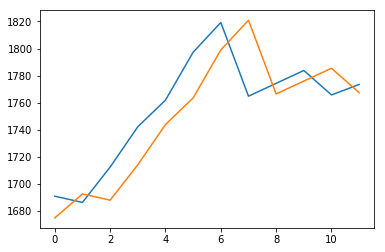

In [76]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# load dataset
series = read_csv('AMZNu.csv', header=0, index_col=0, squeeze=True)
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()